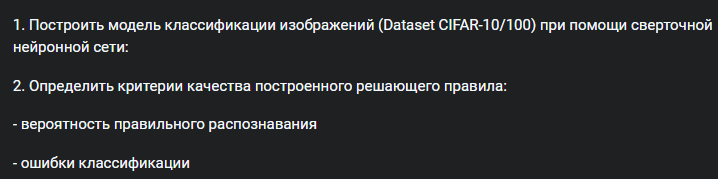

In [1]:
from tensorflow import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# стандартизация входных данных
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_train_cat = keras.utils.to_categorical(y_train, len(class_names))
y_test_cat = keras.utils.to_categorical(y_test, len(class_names))

170498071/170498071 [==============================] - 14s 0us/step


In [2]:
print( x_train.shape )

(50000, 32, 32, 3)


In [3]:
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D


model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(class_names),  activation='softmax')
])

In [4]:
print(model.summary())      # вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [5]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

Epoch 1/5
1250/1250 [==============================] - 13s 4ms/step - loss: 1.6416 - accuracy: 0.4052 - val_loss: 1.3639 - val_accuracy: 0.5215
Epoch 2/5
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3698 - accuracy: 0.5066 - val_loss: 1.2750 - val_accuracy: 0.5533
Epoch 3/5
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2785 - accuracy: 0.5433 - val_loss: 1.1529 - val_accuracy: 0.5938
Epoch 4/5
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2155 - accuracy: 0.5632 - val_loss: 1.1422 - val_accuracy: 0.5970
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.1058 - accuracy: 0.6040


[1.105765461921692, 0.6039999723434448]